# **Minimal example with TensorFlow2.0**

recreate machine learning algorithm using TF

# **Import the relevant libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# **Data generation**

In [8]:
observations = 1000 # 样本数量

xs = np.random.uniform(low=-10, high=10, size=(observations,1)) # matrix size(1000,1) 随机数字：最低-10 最高10
zs = np.random.uniform(-10, 10, (observations,1)) # matrix size(1000,1) 随机数字：最低-10 最高10

generated_inputs = np.column_stack((xs,zs)) # matrix size(1000,2) 每一行是一个样本[x,z]。

noise = np.random.uniform(-1, 1, (observations, 1)) # matrix size(1000,1) 随机数字：最低-1 最高1

generated_targets = 2*xs - 3*zs + 5 +noise # 2=weights, 3=weights, noise=biases

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [9]:
# from google.colab import files

# files.download("TF_intro.npz")
# 这是下载TF_intro.npz到电脑里，但是不需要

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Solving with TensorFlow**

In [29]:
training_data = np.load('TF_intro.npz') # 下载TF_intro.npz
print(training_data.files)
print(training_data['inputs'][:5]) # 打印前5个输入
print(training_data['targets'][:5]) # 打印前5个目标值

['inputs', 'targets']
[[ 4.87848153  8.43141051]
 [-4.80232526 -4.13891854]
 [ 4.3528872   5.18221094]
 [-2.66507768 -4.57083011]
 [ 6.04291266  0.00856935]]
[[-11.04476307]
 [  7.87646525]
 [ -1.49314275]
 [ 12.72012587]
 [ 16.54076327]]


**TF_intro.npz** 这是一个 NumPy 压缩文件（.npz），里面其实就是一个“字典”，包含了两个数组：

**inputs**

形状：(1000, 2)

内容：每一行就是一条训练数据的输入 [x,z]

**targets**

形状：(1000, 1)

内容：对应输入的输出 y=2x−3z+5+noise，算出的结果是真实值。

In [25]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size, input_shape=(input_size,))
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 0s - 7ms/step - loss: 37.1204
Epoch 2/100
32/32 - 0s - 3ms/step - loss: 4.4826
Epoch 3/100
32/32 - 0s - 2ms/step - loss: 1.4978
Epoch 4/100
32/32 - 0s - 3ms/step - loss: 0.6633
Epoch 5/100
32/32 - 0s - 3ms/step - loss: 0.4327
Epoch 6/100
32/32 - 0s - 5ms/step - loss: 0.3639
Epoch 7/100
32/32 - 0s - 2ms/step - loss: 0.3593
Epoch 8/100
32/32 - 0s - 2ms/step - loss: 0.3477
Epoch 9/100
32/32 - 0s - 4ms/step - loss: 0.3447
Epoch 10/100
32/32 - 0s - 3ms/step - loss: 0.3446
Epoch 11/100
32/32 - 0s - 3ms/step - loss: 0.3511
Epoch 12/100
32/32 - 0s - 2ms/step - loss: 0.3493
Epoch 13/100
32/32 - 0s - 2ms/step - loss: 0.3417
Epoch 14/100
32/32 - 0s - 2ms/step - loss: 0.3352
Epoch 15/100
32/32 - 0s - 3ms/step - loss: 0.3402
Epoch 16/100
32/32 - 0s - 3ms/step - loss: 0.3449
Epoch 17/100
32/32 - 0s - 3ms/step - loss: 0.3413
Epoch 18/100
32/32 - 0s - 5ms/step - loss: 0.3399
Epoch 19/100
32/32 - 0s - 4ms/step - loss: 0.3396
Epoch 20/100
32/32 - 0s - 4ms/step - loss: 0.3406
Epoch 21/100
32/32 -

**tf.keras** 高级 API，用来快速搭建和训练神经网络。

**TensorFlow** 提供底层功能（张量运算、自动求导、分布式训练、GPU/TPU加速）。

**tf.keras** 提供高层接口（模型搭建、训练、评估、保存）。

**Sequential**([...])
表示你在搭建一个顺序模型（每一层按顺序往下传递数据）。

**Dense** 层 内部做的事情本质上就是：

𝑦=x⋅W+b

W：Dense 层自动创建的权重

b：Dense 层自动创建的偏置

**model.compile(optimizer='sgd', loss='mean_squared_error')**

**optimizer='sgd'** 决定 如何更新weights和biases，会执行这两个公式:

weights = weights - learning_rate * np.dot(input.T, deltas_scaled)

biases  = biases - learning_rate * np.sum(deltas_scaled)


**loss='mean_squared_error'** 自动计算误差deltas loss 决定 如何计算预测和目标的差距 loss = np.sum((outputs targets)**2)/2/observations

**model.fit()**

前面所有的步骤准备好后都把步骤保存在model，最后通过fit()执行所有步骤

fit(training_data['inputs'], training_data['targets'])inputs=训练数据 targets=真实值

for loop 重复迭代 (Epochs)。epochs=100 (for i in range(100):)

# **Extract the weights and bias**

**算出结果：最好的weights and bias**

In [16]:
model.layers[0].get_weights()

[array([[ 2.0371773],
        [-2.9975133]], dtype=float32),
 array([4.9872475], dtype=float32)]

In [17]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0371773],
       [-2.9975133]], dtype=float32)

In [18]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9872475], dtype=float32)

# **Extract the outputs (make predictions)**

**算出最好的weights and bias后得出的predict value**

In [19]:
model.predict_on_batch(training_data['inputs'])

array([[-1.03476868e+01],
       [ 7.61052227e+00],
       [-1.67889500e+00],
       [ 1.32591343e+01],
       [ 1.72720451e+01],
       [-2.17251015e+01],
       [-2.45407925e+01],
       [-2.08753891e+01],
       [ 3.64708405e+01],
       [ 3.71382561e+01],
       [-8.14356709e+00],
       [-2.96729946e+00],
       [ 8.74530792e+00],
       [ 5.00723934e+00],
       [-1.74072247e+01],
       [ 2.07479210e+01],
       [ 1.05597010e+01],
       [-3.34705544e+01],
       [-9.90777206e+00],
       [ 1.06438217e+01],
       [ 4.27959862e+01],
       [ 6.80057526e-01],
       [-4.43906136e+01],
       [ 4.26991224e+00],
       [ 3.59780502e+01],
       [ 2.06513023e+01],
       [-4.09531212e+00],
       [ 1.46307316e+01],
       [-1.29077797e+01],
       [ 1.38507051e+01],
       [-1.46513824e+01],
       [-2.50332832e-01],
       [ 1.18542271e+01],
       [-1.53530712e+01],
       [ 2.72122025e+00],
       [ 3.51427116e+01],
       [ 7.23536921e+00],
       [ 2.35530643e+01],
       [-1.8

In [20]:
training_data['targets'].round(1)
# 真实值

array([[-11. ],
       [  7.9],
       [ -1.5],
       [ 12.7],
       [ 16.5],
       [-21.8],
       [-24.7],
       [-21.5],
       [ 36.8],
       [ 37.1],
       [ -8. ],
       [ -2.2],
       [  8.2],
       [  5. ],
       [-17.9],
       [ 20.7],
       [ 11.2],
       [-33.6],
       [ -8.7],
       [ 11.4],
       [ 43. ],
       [  0.9],
       [-44.1],
       [  3.9],
       [ 35.5],
       [ 21.4],
       [ -4.7],
       [ 13.9],
       [-12.5],
       [ 13.9],
       [-15.3],
       [  0.6],
       [ 12.5],
       [-15.5],
       [  3.7],
       [ 34.5],
       [  6.5],
       [ 23.1],
       [  0.4],
       [ -5.8],
       [-22.1],
       [  7.2],
       [  5.7],
       [-25.7],
       [  3.5],
       [  4. ],
       [-13.6],
       [  1.8],
       [  7.9],
       [-23.6],
       [ 38.9],
       [ 17.9],
       [ -4.5],
       [  6.5],
       [ 19.9],
       [-17.6],
       [-17.7],
       [ 44.6],
       [ -9.1],
       [  1.1],
       [  3.6],
       [ 19.2],
       [

# **Plotting the data**

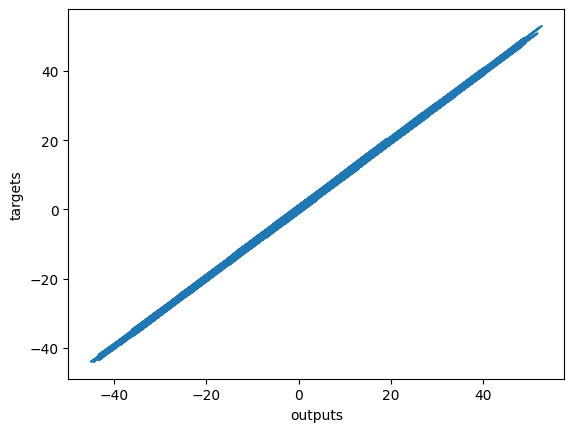

In [22]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()